# c03-stang

*Purpose*: When designing structures such as bridges, boats, and planes, the design team needs data about *material properties*. Often when we engineers first learn about material properties through coursework, we talk about abstract ideas and look up values in tables without ever looking at the data that gave rise to published properties. In this challenge you'll study an aluminum alloy dataset: This will give you a better sense of the challenges underlying published material values.

We will also use grama to connect these material properties to engineering outcomes: This will give you a sense for how variability

In this challenge, you will load a real dataset, wrangle it into tidy form, and perform EDA to learn more about the data.


In [1]:
import grama as gr
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype

DF = gr.Intention()

## Background

In 1946, scientists at the Bureau of Standards tested a number of Aluminum plates to determine their [elasticity](https://en.wikipedia.org/wiki/Elastic_modulus) and [Poisson's ratio](https://en.wikipedia.org/wiki/Poisson%27s_ratio) [1]. These are key quantities used in the design of structural members, such as aircraft skin under [buckling loads](https://en.wikipedia.org/wiki/Buckling). These scientists tested plats of various thicknesses, and at different angles with respect to the [rolling](https://en.wikipedia.org/wiki/Rolling_(metalworking)) direction.


In [2]:
from grama.data import df_stang_wide
df_stang_wide

,thick,E_00,mu_00,E_45,mu_45,E_90,mu_90,alloy
0,0.022,10600,0.321,10700,0.329,10500,0.310,al_24st
1,0.022,10600,0.323,10500,0.331,10700,0.323,al_24st
2,0.032,10400,0.329,10400,0.318,10300,0.322,al_24st
3,0.032,10300,0.319,10500,0.326,10400,0.330,al_24st
4,0.064,10500,0.323,10400,0.331,10400,0.327,al_24st
5,0.064,10700,0.328,10500,0.328,10500,0.320,al_24st
6,0.081,10000,0.315,10000,0.320,9900,0.314,al_24st
7,0.081,10100,0.312,9900,0.312,10000,0.316,al_24st
8,0.081,10000,0.311,-1,-1.000,9900,0.314,al_24st


## Setup


### __q1__ Tidy the data

Tidy `df_stang_wide` to produce `df_stang`. You should have column names `thick, alloy, angle, E, nu`. Make sure the `angle` variable is of correct type. Filter out any invalid values.

*Hint*: This is **far easier** if you use the special `".value"` argument for `names_to`.


In [3]:
## TASK: Tidy df_stang_wide
df_stang = (
    df_stang_wide
# task-begin
    ## WRITE YOUR CODE HERE
# task-end 
# solution-begin
    >> gr.tf_pivot_longer(
        columns=["E_00", "mu_00", "E_45", "mu_45", "E_90", "mu_90"],
        names_to=[".value", "angle"],
        names_sep="_"
    )
    >> gr.tf_filter(DF.E > 0)
    >> gr.tf_mutate(
        angle=gr.as_float(DF.angle)
    )
# solution-end
)

df_stang

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,thick,alloy,angle,E,mu
0,0.022,al_24st,0.0,10600.0,0.321
1,0.022,al_24st,45.0,10700.0,0.329
2,0.022,al_24st,90.0,10500.0,0.310
3,0.022,al_24st,0.0,10600.0,0.323
4,0.022,al_24st,45.0,10500.0,0.331
5,0.022,al_24st,90.0,10700.0,0.323
6,0.032,al_24st,0.0,10400.0,0.329
7,0.032,al_24st,45.0,10400.0,0.318
8,0.032,al_24st,90.0,10300.0,0.322
9,0.032,al_24st,0.0,10300.0,0.319


Use the following tests to check your work.


In [4]:
# Correct columns
assert \
    set(df_stang.columns) ==  set(["thick", "alloy", "angle", "E", "mu"]), \
    "Incorrect columns in df_stang"

# Dimensions
assert \
    (df_stang.shape[0] <= 27), \
    "Too many rows; did you pivot the data?"
assert \
    (df_stang.shape[0] <= 26), \
    "Too many rows; did you filter the invalid values?"
assert \
    (df_stang.shape[0] == 26), \
    "Too few rows; did you filter *only* invalid values?"
    
# Types
assert \
    (is_numeric_dtype(df_stang["angle"])), \
    "angle columns is not numeric; make sure to convert this column"


## EDA


### __q2__ EDA without visualization

Perform a basic EDA on the aluminum data *without visualization*. Use your analysis to answer the questions under *observations* below. 


In [5]:
## TASK: Perform EDA *without visualization* here
# task-begin
## Top-level facts?
# task-end
# solution-begin
# Head
print(
    df_stang
    >> gr.tf_head(10)
)

# Describe
print(
    df_stang
    >> gr.tf_describe()
)
# solution-end

   thick     alloy  angle        E     mu
0  0.022   al_24st    0.0  10600.0  0.321
1  0.022   al_24st   45.0  10700.0  0.329
2  0.022   al_24st   90.0  10500.0  0.310
3  0.022   al_24st    0.0  10600.0  0.323
4  0.022   al_24st   45.0  10500.0  0.331
5  0.022   al_24st   90.0  10700.0  0.323
6  0.032   al_24st    0.0  10400.0  0.329
7  0.032   al_24st   45.0  10400.0  0.318
8  0.032   al_24st   90.0  10300.0  0.322
9  0.032   al_24st    0.0  10300.0  0.319
           thick      angle             E         mu
count  26.000000  26.000000     26.000000  26.000000
mean    0.052154  45.000000  10334.615385   0.321231
std     0.024812  38.183766    268.242141   0.006743
min     0.022000   0.000000   9900.000000   0.310000
25%     0.032000   0.000000  10025.000000   0.315250
50%     0.064000  45.000000  10400.000000   0.321500
75%     0.081000  90.000000  10500.000000   0.327750
max     0.081000  90.000000  10700.000000   0.331000


In [6]:
# task-begin
## Distinct alloys?
# task-end
# solution-begin
print("Distinct alloys")
print(
    df_stang
    >> gr.tf_distinct("alloy")
)
# solution-end

Distinct alloys
   thick     alloy  angle        E     mu
0  0.022   al_24st    0.0  10600.0  0.321


In [7]:
# task-begin
## Distinct angles?
# task-end
# solution-begin
print("Distinct angles")
print(
    df_stang
    >> gr.tf_distinct("angle")
)
# solution-end

Distinct angles
   thick     alloy  angle        E     mu
0  0.022   al_24st    0.0  10600.0  0.321
1  0.022   al_24st   45.0  10700.0  0.329
2  0.022   al_24st   90.0  10500.0  0.310


In [8]:
# task-begin
## Distinct thicknesses?
# task-end
# solution-begin
print("Distinct thicknesses")
print(
    df_stang
    >> gr.tf_group_by("thick")
    >> gr.tf_summarize(n=gr.n(DF.index))
)
# solution-end

Distinct thicknesses
   thick  n
0  0.022  6
1  0.032  6
2  0.064  6
3  0.081  8


**Observations**:

<!-- task-begin -->
- Do you see identical values for the material properties?
  - (Your response here)
- How many aluminum alloys are in this dataset? How do you know?
  - (Your response here)
- What angles were tested?
  - (Your response here)
- What thicknesses were tested?
  - (Your response here)
<!-- task-end -->
<!-- solution-begin -->
- Do you see identical values for the material properties?
  - No; we see a variety of values for `E` and `nu`.
- How many aluminum alloys are in this dataset? How do you know?
  - Just one alloy: al_24st. I know because I pulled the column and used `unique()`
- What angles were tested?
  - Angles: 0, 45, 90 (degrees)
- What thicknesses were tested?
  - Thicknesses: 0.022, 0.032, 0.064, 0.081 (in)
<!-- solution-end -->


### __q3__ Induced or real variability?

The variability we see in the material properties `E, mu` could be induced, real, or some mix of the two. Let's read a bit from the original paper to see what the original investigators thought about their data. Read the following passage, and answer the questions under *observations* below.

![Stang passage](./images/c03-stang-variability.png)


*Observations*

<!-- task-begin -->
- Based on what the authors wrote, do they believe that the observed variability is *purely* induced?
  - (Your response here)
- Is there likely to be real variability in the observed material properties?
  - (Your response here)
- Try doing a websearch for `"elasticity of aluminum"`; you are likely to find results that quote a single value for `E`. What does your previous observation tell us about the limitations of this "single number" view of material properties?
<!-- task-end -->

<!-- solution-begin -->
- Based on what the authors wrote, do they believe that the observed variability is *purely* induced?
  - No, the authors clearly state that there is "inherent" (real) variability "in the material itself."
- Is there likely to be real variability in the observed material properties?
  - Most likely yes; the original authors believe that there is real variability in the observed properties.
- Try doing a websearch for `"elasticity of aluminum"`; you are likely to find results that quote a single value for `E`. What does your previous observation tell us about the limitations of this "single number" view of material properties?
  - Since there can be real variability in material properties, a "single number" view ignores this variability.
<!-- solution-end -->


## Assess a Claim

We can use a combination of visualization tools and critical thinking to do useful work: Next you'll 


### __q4__ Compare evidence against a claim

Consider the following definition:

> "A material's property (or material property) is an intensive property of some material, i.e. a physical property that does not depend on the amount of the material."[2]

Note that the "amount of material" would vary with the thickness of a tested plate. Does the following graph support or contradict the following claim?

> Claim: Elasticity `E` is an intensive material property.

Inspect the graph below, and answer the questions under *observations* below.


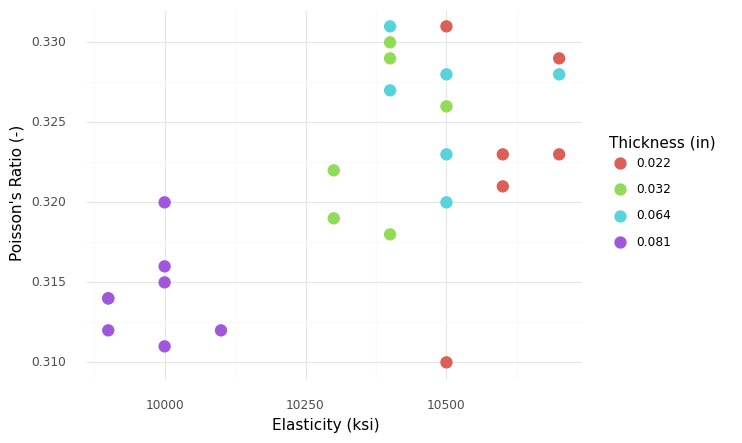

<ggplot: (8790448604185)>

In [17]:
# NOTE: No need to edit; run and inspect
(
    df_stang
    >> gr.ggplot(gr.aes("E", "mu", color="factor(thick)"))
    + gr.geom_point(size=4)
    
    + gr.scale_color_discrete(name="Thickness (in)")
    + gr.theme_minimal()
    + gr.labs(
        x="Elasticity (ksi)",
        y="Poisson's Ratio (-)",
    )
)

*Observations*

<!-- task-begin -->
- Does this graph support or contradict the claim above?
  - (Your response here)
- Is the evidence conclusive?
  - (Your response here)
<!-- task-end -->

<!-- solution-begin -->
- The graph contradicts the claim; the elasticity of the alloy is demonstrably smaller for the thickest plates.
- The evidence is *not* conclusive; it is possible that other factors could account for this discrepancy. For instance, the article notes (Method a-2, Sec. 2(a)) that the elasticity of the 0.081in plates was measured using a different method, compared to the other plates. Thus calibration issues could account for an offset in values.
<!-- solution-end -->


### __q5__ Check the data collection methods

Read the following section from the original paper, and answer the questions below.

![Stang image](./images/c03-stang-measurements.png)


*Observations*

<!-- task-begin -->
- In __q3__ we saw variation in the material properties `E, mu` with thickness. One possible explanation for that variation is that material properties can vary with thickness---hence, they are not intensive properties. What alternative explanation does this section from the paper suggest?
  - (Your response here)
<!-- task-end -->

<!-- solution-begin -->
- The article notes (Method a-2, Sec. 2(a)) that the elasticity of the 0.081in plates was measured using a different method, compared to the other (thinner) plates. Thus differences in measurement calibration could account for an offset in values.
<!-- solution-end -->

## Study Consequences With a Model


### __q6__ Implement a model

( [Plate buckling](https://en.wikipedia.org/wiki/Buckling#Plate_buckling). )

| Variable | Meaning | Units |
|----------|---------|-------|
| `E`      | Elasticity | kips/in^2 |
| `mu`     | Poisson's ratio | - |
| `a`      | Length  | in    |
| `b`      | Width   | in    |
| `t`      | Thickness | in    |
| `m`      | Wavenumber | -    |

$$\sigma_{cr} = k_{cr} \frac{\pi^2 E}{12 (1 - \mu^2)} \left(\frac{t}{b}\right)^2$$

where

$$k_{cr} = \left(\frac{mb}{a} + \frac{a}{mb}\right)^2$$



In [12]:
## NOTE: This scaffolding will get you started
md_plate = (
    gr.Model("Plate critical buckling stress")
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            k_cr=(df.m * df.b / df.a + df.a / df.m / df.b)**2
        ),
        var=["a", "b", "m"],
        out=["k_cr"],
    )
# task-begin
    ## TASK: Complete the model to provide the sigma_cr output
# task-end
# solution-begin
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
#             sigma_cr=df.k_cr * (3.14**3/12) * df.E / (1 - df.mu**2)
            sigma_cr=df.k_cr * (3.14**3/12) * df.E*1e3 / (1 - df.mu**2)
                    *(df.t / df.b)**2
        ),
        var=["k_cr", "E", "mu", "t", "b"],
        out=["sigma_cr"]
    )
# solution-end
)

md_plate

model: Plate critical buckling stress

  inputs:
    var_det:
      E: (unbounded)
      t: (unbounded)
      mu: (unbounded)
      b: (unbounded)
      m: (unbounded)
      a: (unbounded)

    var_rand:

    copula:
      None

  functions:
      f0: ['a', 'b', 'm'] -> ['k_cr']
      f1: ['k_cr', 'E', 'mu', 't', 'b'] -> ['sigma_cr']

Use the following to check your work.


In [13]:
## NOTE: No need to edit, use this to check your work
df_plate_test = (
    md_plate
    >> gr.ev_df(df=gr.df_make(
        a=1,
        b=1,
        t=0.125,
        E=10500,
        mu=0.32,
        m=1,
    ))
)
print(df_plate_test)

assert \
    not (abs(df_plate_test.sigma_cr[0] - 1.886228e3) < 1e-3), \
    "Incorrect sigma_cr; did you remember to convert E from kips to lbf?"

assert \
    not (abs(df_plate_test.sigma_cr[0] - 1.886228e6) < 1e-3), \
    "Incorrect sigma_cr; double-check your work"


   a  b      t      E    mu  m  k_cr      sigma_cr
0  1  1  0.125  10500  0.32  1   4.0  1.886228e+06


### __q7__ Interpret results, part 1

The following code sweeps the model over various aspect ratios (length / width) and wavenumbers `m`, and computes the critical buckling stress. It also considers the variability observed in the material properties `E, mu` and reports this as a band about each curve (as the min and max observed).

Inspect the plot below, and answer the questions under *observe*.


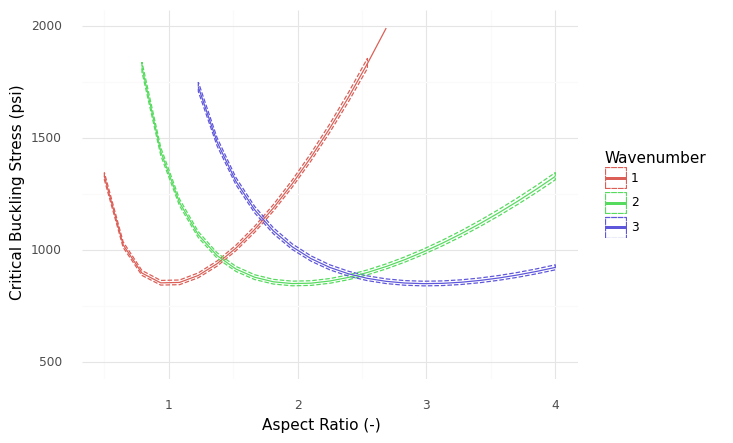

<ggplot: (8790446505725)>

In [14]:
## NOTE: No need to edit; run and inspect
(
    df_stang
    >> gr.tf_filter(DF.thick == 0.032)
    >> gr.tf_rename(t="thick")
    
    >> gr.tf_outer(
        df_outer=gr.df_make(m=[1, 2, 3])
    )
    >> gr.tf_outer(
        df_outer=gr.df_make(a=np.linspace(6, 48, num=25))
    )
    >> gr.tf_mutate(b=12)
    >> gr.tf_md(md_plate)
    
    >> gr.tf_group_by(DF.a, DF.m, DF.b)
    >> gr.tf_summarize(
        sigma_cr_min=gr.colmin(DF.sigma_cr),
        sigma_cr_mean=gr.mean(DF.sigma_cr),
        sigma_cr_max=gr.colmax(DF.sigma_cr),
    )
    
    >> gr.ggplot(gr.aes("a / b", color="factor(m)"))
    + gr.geom_ribbon(
        gr.aes(ymin="sigma_cr_min", ymax="sigma_cr_max"),
        linetype="dashed",
        fill=None,
    )
    + gr.geom_line(gr.aes(y="sigma_cr_mean"))
    
    + gr.scale_y_continuous(limits=(500, 2000))
    + gr.scale_color_discrete(name="Wavenumber")
    + gr.theme_minimal()
    + gr.labs(
        x="Aspect Ratio (-)",
        y="Critical Buckling Stress (psi)"
    )
)

*Observe*

<!-- task-begin -->
- At an aspect ratio of 1, which buckling mode (wavenumber) will be the most concerning?
  - (Your response here)
- At an aspect ratio of 2, which buckling mode (wavenumber) will be the most concerning?
  - (Your response here)
- How does the variability in buckling strength due to material properties compare with the variability due to aspect ratio?
  - (Your response here)
- Would it be necessary to consider the variability of material properties for making decisions about the aspect ratio? Say we were deciding between `AR = 1` and `AR = 1.5`.
  - (Your response here)
<!-- task-end -->
<!-- solution-begin -->
- At an aspect ratio of 1, buckling mode 1 (`m = 1`) will be most concerning, as it has the lowest critical buckling stress.
- At an aspect ratio of 2, buckling mode 2 (`m = 2`) will be most concerning, as it has the lowest critical buckling stress.
- The variability due to material properties is far less than the variability due to aspect ratio, at least scale we're considering (AR from about 1 to 3).
- Since the variability due to material property variation is so small, compared to the variability due to `AR`, we would not need to consider the variability of material properties.
<!-- solution-end -->


### __q8__ Interpret results, part 2




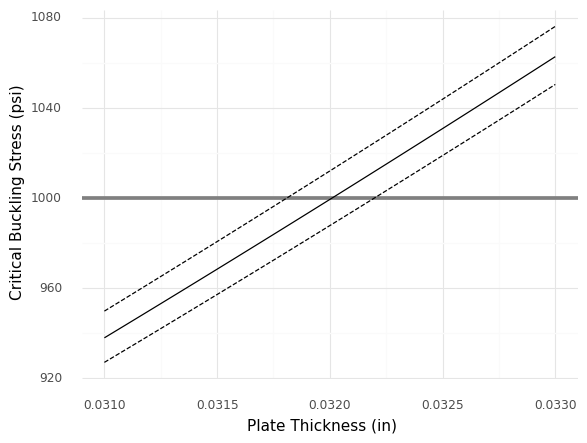

<ggplot: (8790446942892)>

In [15]:
## NOTE: No need to edit; run and inspect
(
    df_stang
    >> gr.tf_filter(DF.thick == 0.032)
    >> gr.tf_drop("thick")
    
    >> gr.tf_outer(
        df_outer=gr.df_make(t=np.linspace(0.031, 0.033, num=25))
    )
    >> gr.tf_mutate(a=12 * 1.5, b=12, m=1)
    >> gr.tf_md(md_plate)
    
    >> gr.tf_group_by(DF.t)
    >> gr.tf_summarize(
        sigma_cr_min=gr.colmin(DF.sigma_cr),
        sigma_cr_mean=gr.mean(DF.sigma_cr),
        sigma_cr_max=gr.colmax(DF.sigma_cr),
    )
    
    >> gr.ggplot(gr.aes("t"))
    + gr.geom_hline(yintercept=1000, color="grey", size=1.5)
    + gr.geom_line(gr.aes(y="sigma_cr_min"), linetype="dashed")
    + gr.geom_line(gr.aes(y="sigma_cr_mean"))
    + gr.geom_line(gr.aes(y="sigma_cr_max"), linetype="dashed")
    
    + gr.theme_minimal()
    + gr.labs(
        x="Plate Thickness (in)",
        y="Critical Buckling Stress (psi)"
    )
)

# References

[1] Stang, Greenspan, and Newman, "Poisson's ratio of some structural alloys for large strains" (1946) Journal of Research of the National Bureau of Standards, [pdf link](https://nvlpubs.nist.gov/nistpubs/jres/37/jresv37n4p211_A1b.pdf)

[2] Wikipedia, *List of material properties*, accessed 2020-06-26, [link](https://en.wikipedia.org/wiki/List_of_materials_properties)
